In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('/content/dataset_ica_ml_train.csv')
test_df = pd.read_csv('/content/dataset_ica_ml_test.csv')

# 全体像の把握および欠損値、要約統計量の確認

In [ ]:
train_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,expenditure_2,expenditure_3,expenditure_4,expenditure_5,expenditure_6,expenditure_7,expenditure_8,expenditure_9,expenditure_10,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,event_10,year
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1000,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,2018
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2018
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2018
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1000,0,0,2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1000,500,2000,0,5000,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,2018


In [ ]:
test_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,expenditure_2,expenditure_3,expenditure_4,expenditure_5,expenditure_6,expenditure_7,expenditure_8,expenditure_9,expenditure_10,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,event_10,year
0,621,France,Female,41,2,65.00,1,1,1,101347.88,1,956,-4,-21,29,-96,-17,48,51,-70,-1,1,0,1,0,0,0,1,1,0,0,2019
1,615,Spain,Female,40,1,83762.86,1,0,1,112541.58,0,1013,38,58,76,-9,72,11,-43,70,43,0,0,0,1,1,0,0,0,0,0,2019
2,495,France,Female,41,7,159659.80,3,1,0,113931.57,1,-42,7,-11,20,-78,66,41,-71,5,18,0,0,0,0,1,0,0,1,0,0,2019
3,704,France,Female,38,1,92.00,2,0,0,93826.63,0,991,38,63,2447,55,69,14,-12,-84,-45,0,0,0,0,0,0,0,0,0,0,2019
4,859,Spain,Female,43,2,125536.82,1,1,1,79084.10,1,968,508,1960,-24,5089,75,-31,44,93,-47,0,1,1,1,0,0,1,0,0,0,2019


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  expenditure_1    10000 non-null  int64  
 12  expenditure_2    10000 non-null  int64  
 13  expenditure_3    10000 non-null  int64  
 14  expenditure_4    10000 non-null  int64  
 15  expenditure_5    10000 non-null  int64  
 16  expenditure_6    10000 non-null  int64  
 17  expenditure_7

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  expenditure_1    10000 non-null  int64  
 12  expenditure_2    10000 non-null  int64  
 13  expenditure_3    10000 non-null  int64  
 14  expenditure_4    10000 non-null  int64  
 15  expenditure_5    10000 non-null  int64  
 16  expenditure_6    10000 non-null  int64  
 17  expenditure_7

In [ ]:
train_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,expenditure_2,expenditure_3,expenditure_4,expenditure_5,expenditure_6,expenditure_7,expenditure_8,expenditure_9,expenditure_10,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,event_10,year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,396.400000,150.700000,389.200000,260.750000,465.500000,117.000000,36.050000,45.00000,12.500000,0.500000,0.802400,0.602700,0.500000,0.310100,0.451700,0.197200,0.097500,0.218600,0.052200,0.009500,2018.0
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,489.173762,229.444491,791.824513,764.161522,1452.935254,402.277495,129.333175,207.31449,176.343017,15.804271,0.398209,0.489364,0.500025,0.462557,0.497687,0.397905,0.296652,0.413317,0.222441,0.097009,0.0
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.0
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.0
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.0
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1000.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.0
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1000.000000,500.000000,2000.000000,2500.000000,5000.000000,1500.000000,500.000000,1000.00000,2500.000000,500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.0


<Axes: xlabel='Age', ylabel='Count'>

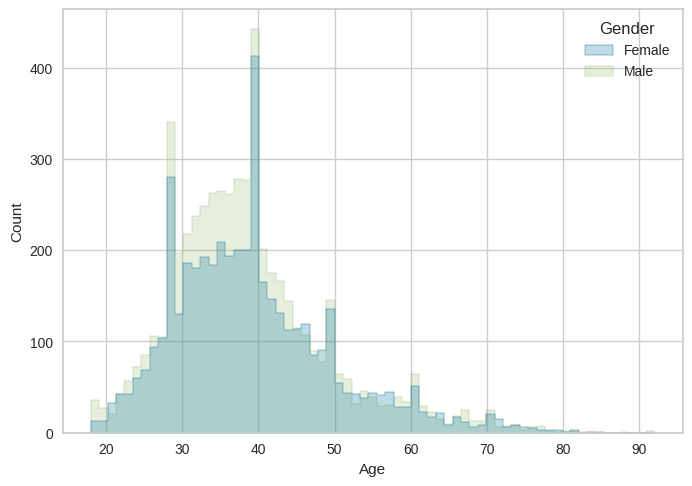

In [ ]:
sns.histplot(train_df, x='Age', hue='Gender', element='step')

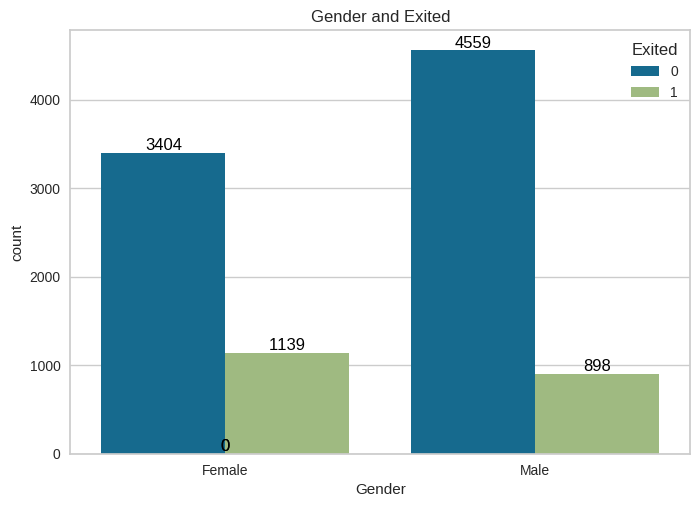

In [ ]:
ax = sns.countplot(data=train_df, x='Gender', hue='Exited')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
ax.set_title('Gender and Exited')
plt.show()

In [ ]:
# 'age' カラムを10歳刻みでグループ化し、新しいカラム 'age_group' を作成。
# 60には60以上も以上も含む
train_df['age_group'] = pd.cut(train_df['Age'], bins=[0, 20, 30, 40, 50, 60, 100],
                               labels=['10', '20', '30', '40', '50', '60'], right=False)

# test_df にも同様の処理。
test_df['age_group'] = pd.cut(test_df['Age'], bins=[0, 20, 30, 40, 50, 60, 100],
                              labels=['10', '20', '30', '40', '50', '60'], right=False)

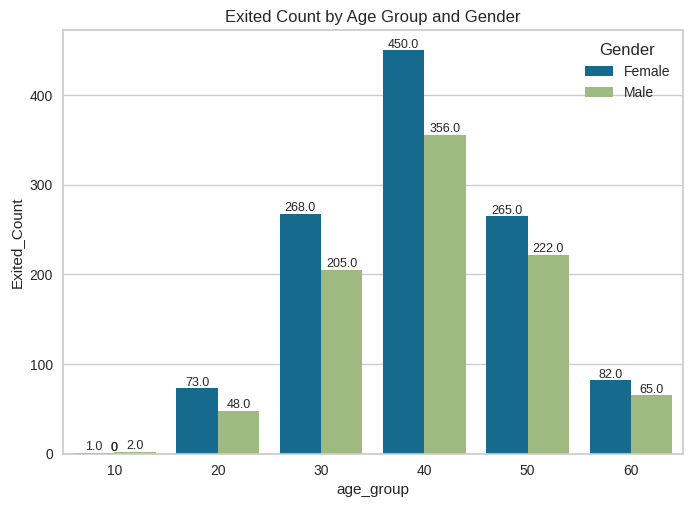

In [ ]:
# 年代別、性別ごとの解約数を集計
exited_counts = train_df.groupby(['age_group', 'Gender'])['Exited'].sum().reset_index(name='Exited_Count')

exited_counts['Exited_Count'] = exited_counts.apply(lambda row: (train_df[(train_df['age_group'] == row['age_group']) & (train_df['Gender'] == row['Gender']) & (train_df['Exited'] == 1)]['Exited'].count()), axis=1)

ax = sns.barplot(x='age_group', y='Exited_Count', hue='Gender', data=exited_counts)
plt.title('Exited Count by Age Group and Gender')

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha='center', size=9)

plt.show()

In [ ]:
# 各商品の0の数をカウント
# expenditure_1 から expenditure_10 までのカラムを選択
expenditures = train_df.loc[:, 'expenditure_1':'expenditure_10']

# 各カラムの 0 の数をカウント
zero_counts = (expenditures == 0).sum()

# 結果を表示
print(zero_counts)

expenditure_1     6036
expenditure_2     6986
expenditure_3     8054
expenditure_4     8957
expenditure_5     9069
expenditure_6     9220
expenditure_7     9279
expenditure_8     9550
expenditure_9     9950
expenditure_10    9990
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

    # '国名' 列を LabelEncoder で数値データに変換
le = LabelEncoder()
train_df['Geography'] = le.fit_transform(train_df['Geography'])

# '性別' 列を LabelEncoder で数値データに変換
train_df['Gender'] = le.fit_transform(train_df['Gender'])

# テストデータにも適応
test_df['Geography'] = le.fit_transform(train_df['Geography'])

# '性別' 列を LabelEncoder で数値データに変換
test_df['Gender'] = le.fit_transform(train_df['Gender'])

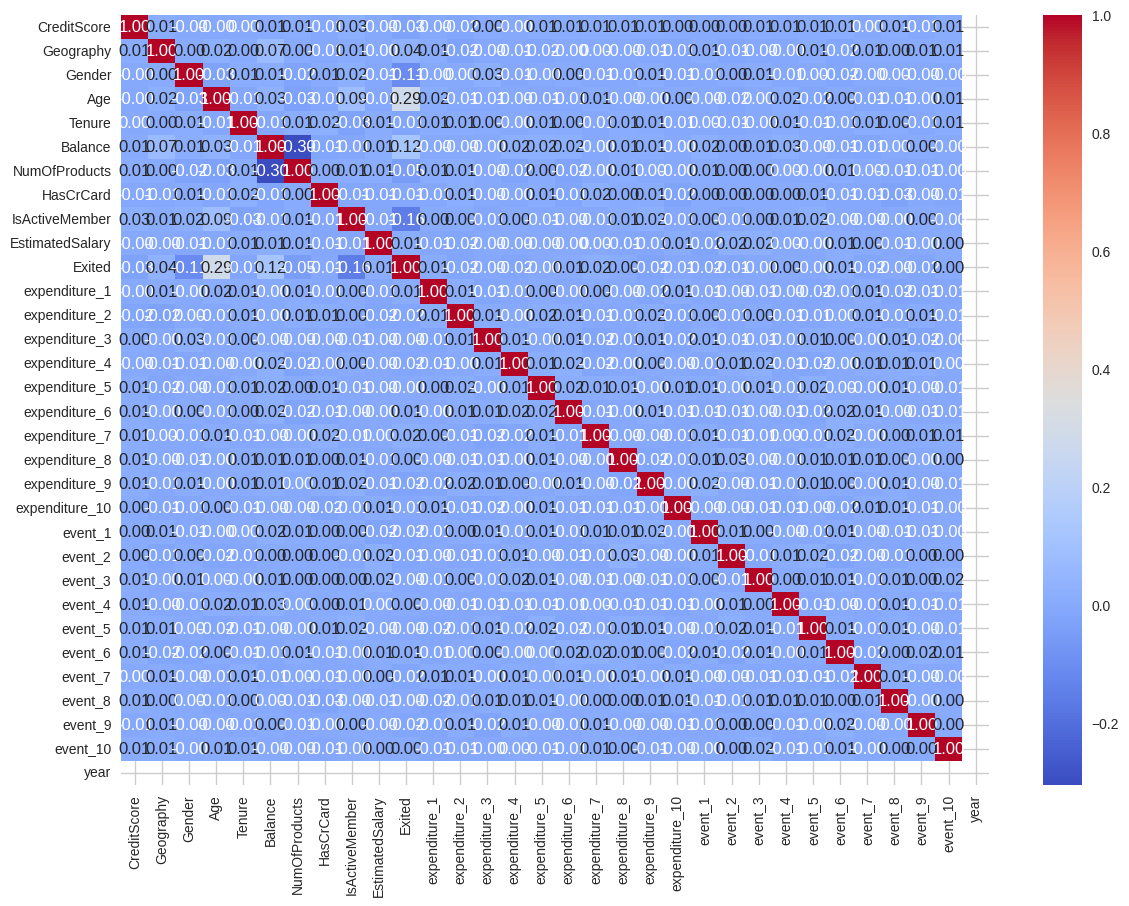

In [ ]:
# 相関行列を計算
corr_matrix = train_df.select_dtypes(include=['number']).corr()

# ヒートマップで可視化
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## 仮説①登録している人の平均自由裁量所得に対する利用額の割合が4.3%以上のユーザーがチャーンしやすいのではないか。

### 特徴量の作成


・各商品の利用料を日本円に換算(160/€)

・推定年収を日本円に換算(160/€)

・税引き後(30%)の月平均所得

・自由裁量所得に占めるサブスク利用額の割合

In [ ]:
# 各 expenditure カラムの値を 160 倍して日本円に変換
for i in range(1, 11):
  column_name = f'expenditure_{i}'
  train_df[column_name] = train_df[column_name] * 160
  test_df[column_name] = test_df[column_name] * 160

In [ ]:
# EstimatedSalary カラムを日本円に換算 (1ユーロ = 160円)
train_df['EstimatedSalary_yen'] = (train_df['EstimatedSalary'] * 160).astype(int)
test_df['EstimatedSalary_yen'] = (test_df['EstimatedSalary'] * 160).astype(int)

In [ ]:
# 税引き後(30%)の月平均所得
train_df['Monthry_Salary'] = (train_df['EstimatedSalary_yen'] * 0.7).astype(int)
test_df['Monthry_Salary'] = (test_df['EstimatedSalary_yen'] * 0.7).astype(int)

In [ ]:
# サブスク利用額の合算値
train_df['Total_expenditure'] = train_df.loc[:,'expenditure_1':'expenditure_10'].sum(axis=1)
test_df['Total_expenditure'] = test_df.loc[:,'expenditure_1':'expenditure_10'].sum(axis=1)

In [ ]:
# 年齢と性別に基づいて自由裁量所得の割合を返す関数
def discretionary_income_rate(age, gender):
  if age < 20:
    return 1.0
  elif age < 30:
    if gender == 'Male':
      return 0.25
    else:
      return 0.285
  elif age < 40:
    if gender == 'Male':
      return 0.215
    else:
      return 0.23
  else:
    return 0.2

# 自由裁量所得を計算する関数
def calculate_discretionary_income(row):
  age = row['Age']
  gender = row['Gender']
  monthly_salary = row['Monthry_Salary']
  rate = discretionary_income_rate(age, gender)
  return int(monthly_salary * rate)

# train_df と test_df に自由裁量所得の列を追加
train_df['Discretionary_Income'] = train_df.apply(calculate_discretionary_income, axis=1)
test_df['Discretionary_Income'] = test_df.apply(calculate_discretionary_income, axis=1)

In [ ]:
# 自由裁量所得に占めるサブスク利用額の割合
train_df['expenditure_ratio'] = train_df['Total_expenditure'] / train_df['Discretionary_Income']
test_df['expenditure_ratio'] = test_df['Total_expenditure'] / test_df['Discretionary_Income']

In [ ]:
train_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,expenditure_2,expenditure_3,expenditure_4,expenditure_5,expenditure_6,expenditure_7,expenditure_8,expenditure_9,expenditure_10,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,event_10,year,age_group,EstimatedSalary_yen,Monthry_Salary,Total_expenditure,Discretionary_Income,expenditure_ratio
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,160000,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,2018,40,16215820,11351074,160000,2270214,0.070478
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,160000,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2018,40,18006812,12604768,160000,2520953,0.063468
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2018,40,18229051,12760335,0,2552067,0.000000
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,160000,0,0,400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,30,15012260,10508582,560000,2416973,0.231695
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,160000,80000,320000,0,800000,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,2018,40,12653456,8857419,1360000,1771483,0.767718


仮設におけるサブスク利用額の割合が4.3％と仮定したが、この値が当該データでも当てはまるのかを検証する。

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# ロジスティック回帰モデルの作成
X = train_df[['expenditure_ratio']]
y = train_df['Exited']
model = LogisticRegression()
model.fit(X, y)

# ROC曲線の描画とAUCの計算
y_pred_proba = model.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)

# AUCが最大となる閾値を探索
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"最適な閾値: {optimal_threshold:.3f}")
print(f"AUC: {auc:.3f}")

最適な閾値: 0.203
AUC: 0.506


このデータにおける最適な閾値が20.3％とわかったため、当初の4.3％を棄却し20.3を基準に新しいカラムを作成する。

In [ ]:
# expenditure_ratio の値が 20.3% 以上を 1、そうでない人を 0 とする新しいカラムを作成
# train_df に新しいカラム 'expenditure_ratio_binary' を作成
train_df['expenditure_ratio_binary'] = np.where(train_df['expenditure_ratio'] >= 0.203, 1, 0)

# test_df にも同様の処理
test_df['expenditure_ratio_binary'] = np.where(test_df['expenditure_ratio'] >= 0.203, 1, 0)

In [ ]:
train_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,expenditure_2,expenditure_3,expenditure_4,expenditure_5,expenditure_6,expenditure_7,expenditure_8,expenditure_9,expenditure_10,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,event_10,year,age_group,EstimatedSalary_yen,Monthry_Salary,Total_expenditure,Discretionary_Income,expenditure_ratio,expenditure_ratio_binary
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,160000,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,2018,40,16215820,11351074,160000,2270214,0.070478,0
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,160000,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2018,40,18006812,12604768,160000,2520953,0.063468,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2018,40,18229051,12760335,0,2552067,0.000000,0
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,160000,0,0,400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,30,15012260,10508582,560000,2416973,0.231695,1
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,160000,80000,320000,0,800000,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,2018,40,12653456,8857419,1360000,1771483,0.767718,1


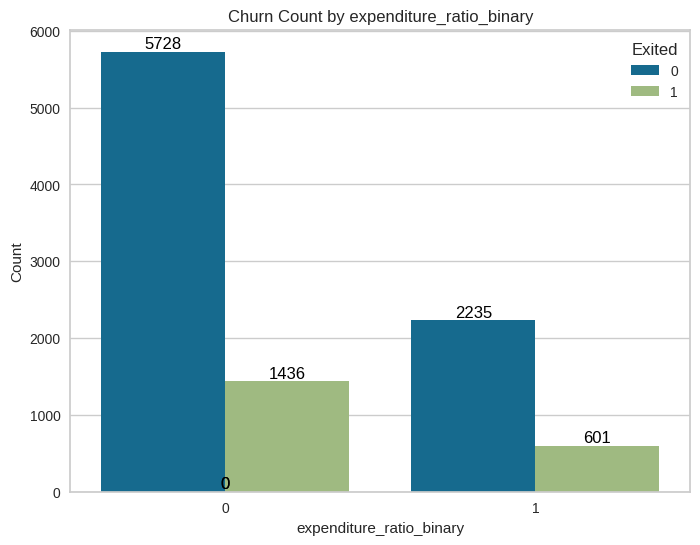

In [ ]:
# expenditure_ratio_binary と Exited の関係をカウントプロットで可視化

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='expenditure_ratio_binary', hue='Exited', data=train_df)
plt.xlabel('expenditure_ratio_binary')
plt.ylabel('Count')
plt.title('Churn Count by expenditure_ratio_binary')

# 各バーに数値を記載
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

#### 仮説①結論

自由裁量所得におけるサブスク利用額の割合が20.3%以下の人の方が解約数が多いため、この仮説は棄却とする。

## 仮説②利用率が一定の割合を下回れば解約率が上がるのではないか。

利用率をキャンペーンフラグの参加率に置き換えて特徴量を作成

### 特徴量の作成

In [ ]:
# 各イベントの参加率
# train_df
for i in range(1, 11):
  event_column = f'event_{i}'
  event_ratio_column = f'event_{i}_ratio'
  train_df[event_ratio_column] = train_df[event_column].apply(lambda x: 1 if x == 1 else 0)

# test_df
for i in range(1, 11):
  event_column = f'event_{i}'
  event_ratio_column = f'event_{i}_ratio'
  test_df[event_ratio_column] = test_df[event_column].apply(lambda x: 1 if x == 1 else 0)

# 各イベントの1の比率を計算
event_ratios = train_df[['event_1_ratio', 'event_2_ratio', 'event_3_ratio', 'event_4_ratio', 'event_5_ratio', 'event_6_ratio', 'event_7_ratio', 'event_8_ratio', 'event_9_ratio', 'event_10_ratio']].mean()

# 結果を表示
print(event_ratios)

event_1_ratio     0.8024
event_2_ratio     0.6027
event_3_ratio     0.5000
event_4_ratio     0.3101
event_5_ratio     0.4517
event_6_ratio     0.1972
event_7_ratio     0.0975
event_8_ratio     0.2186
event_9_ratio     0.0522
event_10_ratio    0.0095
dtype: float64


In [ ]:
# イベント全体における参加率を算出
train_df['event_ratio'] = train_df.filter(like='event_').apply(lambda row: round(sum(row == 1) / len(row), 3), axis=1)

test_df['event_ratio'] = test_df.filter(like='event_').apply(lambda row: round(sum(row == 1) / len(row), 3), axis=1)

In [ ]:
train_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,expenditure_2,expenditure_3,expenditure_4,expenditure_5,expenditure_6,expenditure_7,expenditure_8,expenditure_9,expenditure_10,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,event_10,year,age_group,EstimatedSalary_yen,Monthry_Salary,Total_expenditure,Discretionary_Income,expenditure_ratio,expenditure_ratio_binary,event_1_ratio,event_2_ratio,event_3_ratio,event_4_ratio,event_5_ratio,event_6_ratio,event_7_ratio,event_8_ratio,event_9_ratio,event_10_ratio,event_ratio
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,160000,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,2018,40,16215820,11351074,160000,2270214,0.070478,0,1,0,1,0,0,0,1,1,0,0,0.4
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,160000,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2018,40,18006812,12604768,160000,2520953,0.063468,0,0,0,0,1,1,0,0,0,0,0,0.2
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2018,40,18229051,12760335,0,2552067,0.000000,0,0,0,0,0,1,0,0,1,0,0,0.2
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,160000,0,0,400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,30,15012260,10508582,560000,2416973,0.231695,1,0,0,0,0,0,0,0,0,0,0,0.0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,160000,80000,320000,0,800000,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,2018,40,12653456,8857419,1360000,1771483,0.767718,1,0,1,1,1,0,0,1,0,0,0,0.4


<Axes: xlabel='event_ratio', ylabel='Count'>

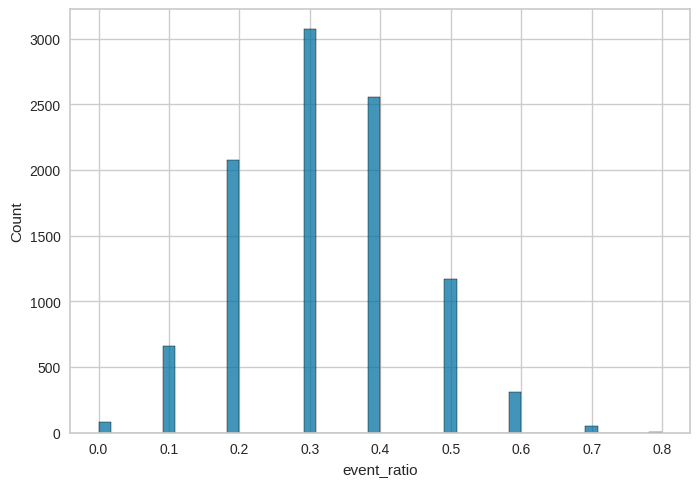

In [ ]:
sns.histplot(train_df['event_ratio'])

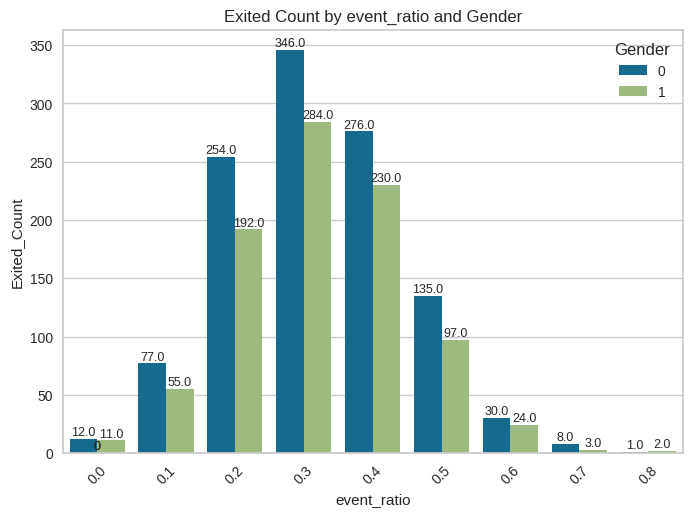

In [ ]:
# 性別ごとのイベント参加率を可視化
exited_counts = train_df.groupby(['event_ratio', 'Gender'])['Exited'].sum().reset_index(name='Exited_Count')

ax = sns.barplot(x='event_ratio', y='Exited_Count', hue='Gender', data=exited_counts)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha='center', size=9)

plt.xticks(rotation=45)
plt.title('Exited Count by event_ratio and Gender')
plt.show()

In [ ]:
#  event_ratio が 40% 未満の場合は 0、40% 以上の場合は 1 となる新しいカラムを train_df_machining に作成。
train_df['event_ratio_binary'] = np.where(train_df['event_ratio'] < 0.40, 0, 1)

test_df['event_ratio_binary'] = np.where(test_df['event_ratio'] < 0.40, 0, 1)

#### 仮設②結論

キャンペーン参加率が40%を下回ると解約数が大きく増加することがわかるので、この仮説は有用とする

## 仮設③商品利用数が少ないほど解約率が高くなるのではないか。

### 特徴量の作成

In [ ]:
train_df['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


In [ ]:
train_df['expenditure_1'].value_counts()

,count
expenditure_1,
0,6036
160000,3964


In [ ]:
# 各行のexpenditureの利用数をカウントし、新しいカラム'expenditure_count'に格納
train_df['expenditure_count'] = train_df.filter(like='expenditure_').apply(lambda row: sum(row > 0), axis=1)

# test_dfにも同様の処理
test_df['expenditure_count'] = test_df.filter(like='expenditure_').apply(lambda row: sum(row > 0), axis=1)

In [ ]:
train_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,expenditure_2,expenditure_3,expenditure_4,expenditure_5,expenditure_6,expenditure_7,expenditure_8,expenditure_9,expenditure_10,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,event_10,year,age_group,EstimatedSalary_yen,Monthry_Salary,Total_expenditure,Discretionary_Income,expenditure_ratio,expenditure_ratio_binary,event_1_ratio,event_2_ratio,event_3_ratio,event_4_ratio,event_5_ratio,event_6_ratio,event_7_ratio,event_8_ratio,event_9_ratio,event_10_ratio,event_ratio,event_ratio_binary,expenditure_count
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,160000,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,2018,40,16215820,11351074,160000,2270214,0.070478,0,1,0,1,0,0,0,1,1,0,0,0.4,1,2
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,160000,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2018,40,18006812,12604768,160000,2520953,0.063468,0,0,0,0,1,1,0,0,0,0,0,0.2,0,2
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2018,40,18229051,12760335,0,2552067,0.000000,0,0,0,0,0,1,0,0,1,0,0,0.2,0,0
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,160000,0,0,400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,30,15012260,10508582,560000,2416973,0.231695,1,0,0,0,0,0,0,0,0,0,0,0.0,0,4
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,160000,80000,320000,0,800000,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,2018,40,12653456,8857419,1360000,1771483,0.767718,1,0,1,1,1,0,0,1,0,0,0,0.4,1,6


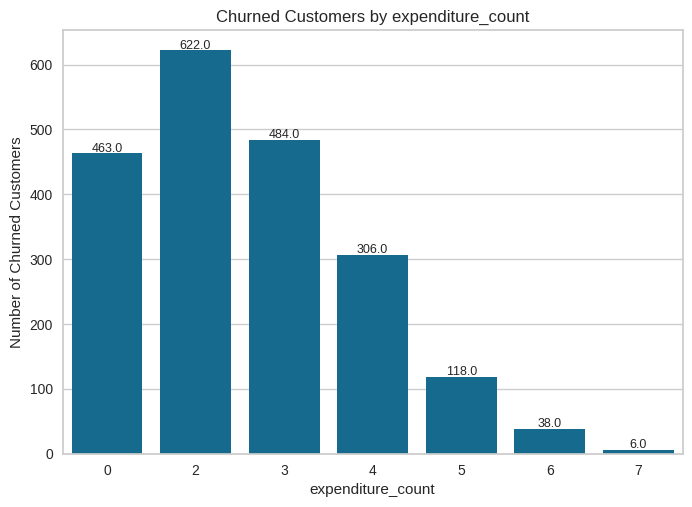

In [ ]:
#expenditure_countの毎の解約状況を可視化
# 解約した人のデータのみを抽出
churned_df = train_df[train_df['Exited'] == 1]

# 解約した人のデータでカウントプロットを作成
ax = sns.countplot(data=churned_df, x='expenditure_count')

# バーに数値を記載
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha='center', size=9)

# グラフのタイトルとラベルを設定
plt.title('Churned Customers by expenditure_count')
plt.xlabel('expenditure_count')
plt.ylabel('Number of Churned Customers')

plt.show()

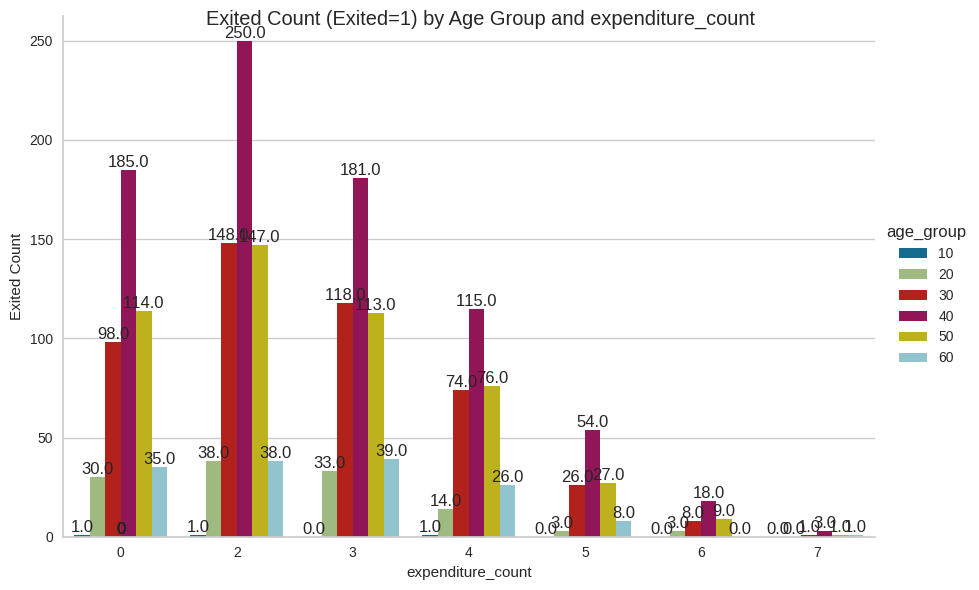

In [ ]:
# 年代別、expenditure_countごとのExited=1の数を集計
exited_counts = train_df[train_df['Exited'] == 1].groupby(['age_group', 'expenditure_count'])['Exited'].count().reset_index(name='Exited_Count')

# 年代別に棒グラフを作成
g = sns.catplot(x='expenditure_count', y='Exited_Count', hue='age_group', data=exited_counts, kind='bar', height=6, aspect=1.5)
g.fig.suptitle('Exited Count (Exited=1) by Age Group and expenditure_count')
g.axes[0,0].set_xlabel('expenditure_count')
g.axes[0,0].set_ylabel('Exited Count')

# 各棒に数値を表示
for ax in g.axes.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), ha='center', va='bottom')

plt.show()

In [ ]:
#商品利用数3個以下の人を0、以上の人を1とする。
train_df['expenditure_count_binary'] = np.where(train_df['expenditure_count'] <= 3, 0, 1)

test_df['expenditure_count_binary'] = np.where(test_df['expenditure_count'] <= 3, 0, 1)

#### 仮設③結論

商品利用数が３個以下になると解約数が大きく増加することがわかるので、この仮説は有用とする。

In [ ]:
train_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,expenditure_2,expenditure_3,expenditure_4,expenditure_5,expenditure_6,expenditure_7,expenditure_8,expenditure_9,expenditure_10,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,event_10,year,age_group,EstimatedSalary_yen,Monthry_Salary,Total_expenditure,Discretionary_Income,expenditure_ratio,expenditure_ratio_binary,event_1_ratio,event_2_ratio,event_3_ratio,event_4_ratio,event_5_ratio,event_6_ratio,event_7_ratio,event_8_ratio,event_9_ratio,event_10_ratio,event_ratio,event_ratio_binary,expenditure_count,expenditure_count_binary
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,160000,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,2018,40,16215820,11351074,160000,2270214,0.070478,0,1,0,1,0,0,0,1,1,0,0,0.4,1,2,0
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,160000,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2018,40,18006812,12604768,160000,2520953,0.063468,0,0,0,0,1,1,0,0,0,0,0,0.2,0,2,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2018,40,18229051,12760335,0,2552067,0.000000,0,0,0,0,0,1,0,0,1,0,0,0.2,0,0,0
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,160000,0,0,400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,30,15012260,10508582,560000,2416973,0.231695,1,0,0,0,0,0,0,0,0,0,0,0.0,0,4,1
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,160000,80000,320000,0,800000,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,2018,40,12653456,8857419,1360000,1771483,0.767718,1,0,1,1,1,0,0,1,0,0,0,0.4,1,6,1


In [ ]:
test_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,expenditure_2,expenditure_3,expenditure_4,expenditure_5,expenditure_6,expenditure_7,expenditure_8,expenditure_9,expenditure_10,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,event_10,year,age_group,EstimatedSalary_yen,Monthry_Salary,Total_expenditure,Discretionary_Income,expenditure_ratio,expenditure_ratio_binary,event_1_ratio,event_2_ratio,event_3_ratio,event_4_ratio,event_5_ratio,event_6_ratio,event_7_ratio,event_8_ratio,event_9_ratio,event_10_ratio,event_ratio,event_ratio_binary,expenditure_count,expenditure_count_binary
0,621,0,0,41,2,65.00,1,1,1,101347.88,1,152960,-640,-3360,4640,-15360,-2720,7680,8160,-11200,-160,1,0,1,0,0,0,1,1,0,0,2019,40,16215660,11350962,140000,2270192,0.061669,0,1,0,1,0,0,0,1,1,0,0,0.4,1,5,1
1,615,2,0,40,1,83762.86,1,0,1,112541.58,0,162080,6080,9280,12160,-1440,11520,1760,-6880,11200,6880,0,0,0,1,1,0,0,0,0,0,2019,40,18006652,12604656,212640,2520931,0.084350,0,0,0,0,1,1,0,0,0,0,0,0.2,0,9,1
2,495,0,0,41,7,159659.80,3,1,0,113931.57,1,-6720,1120,-1760,3200,-12480,10560,6560,-11360,800,2880,0,0,0,0,1,0,0,1,0,0,2019,40,18229051,12760335,-7200,2552067,-0.002821,0,0,0,0,0,1,0,0,1,0,0,0.2,0,6,1
3,704,0,0,38,1,92.00,2,0,0,93826.63,0,158560,6080,10080,391520,8800,11040,2240,-1920,-13440,-7200,0,0,0,0,0,0,0,0,0,0,2019,30,15012260,10508582,565760,2416973,0.234078,1,0,0,0,0,0,0,0,0,0,0,0.0,0,9,1
4,859,2,0,43,2,125536.82,1,1,1,79084.10,1,154880,81280,313600,-3840,814240,12000,-4960,7040,14880,-7520,0,1,1,1,0,0,1,0,0,0,2019,40,12653456,8857419,1381600,1771483,0.779912,1,0,1,1,1,0,0,1,0,0,0,0.4,1,9,1


# 作成した特徴量を一度保存

In [ ]:
import csv

with open('train_df_machining.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    # ヘッダー行を書き込む
    writer.writerow(train_df.columns)
    # データ行を書き込む
    for index, row in train_df.iterrows():
        writer.writerow(row.tolist())

In [ ]:
import csv

with open('test_df_machining.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    # ヘッダー行を書き込む
    writer.writerow(test_df.columns)
    # データ行を書き込む
    for index, row in test_df.iterrows():
        writer.writerow(row.tolist())

In [ ]:
train_df_machining = pd.read_csv('/content/train_df_machining.csv')

In [ ]:
test_df_machining = pd.read_csv('/content/test_df_machining.csv')

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
train_df_machining.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,expenditure_2,expenditure_3,expenditure_4,expenditure_5,expenditure_6,expenditure_7,expenditure_8,expenditure_9,expenditure_10,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,event_10,year,age_group,EstimatedSalary_yen,Monthry_Salary,Total_expenditure,Discretionary_Income,expenditure_ratio,expenditure_ratio_binary,event_1_ratio,event_2_ratio,event_3_ratio,event_4_ratio,event_5_ratio,event_6_ratio,event_7_ratio,event_8_ratio,event_9_ratio,event_10_ratio,event_ratio,event_ratio_binary,expenditure_count,expenditure_count_binary
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,160000,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,2018,40,16215820,11351074,160000,2270214,0.070478,0,1,0,1,0,0,0,1,1,0,0,0.4,1,2,0
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,160000,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2018,40,18006812,12604768,160000,2520953,0.063468,0,0,0,0,1,1,0,0,0,0,0,0.2,0,2,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2018,40,18229051,12760335,0,2552067,0.000000,0,0,0,0,0,1,0,0,1,0,0,0.2,0,0,0
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,160000,0,0,400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,30,15012260,10508582,560000,2416973,0.231695,1,0,0,0,0,0,0,0,0,0,0,0.0,0,4,1
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,160000,80000,320000,0,800000,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,2018,40,12653456,8857419,1360000,1771483,0.767718,1,0,1,1,1,0,0,1,0,0,0,0.4,1,6,1


In [ ]:
test_df_machining.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,expenditure_2,expenditure_3,expenditure_4,expenditure_5,expenditure_6,expenditure_7,expenditure_8,expenditure_9,expenditure_10,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,event_10,year,age_group,EstimatedSalary_yen,Monthry_Salary,Total_expenditure,Discretionary_Income,expenditure_ratio,expenditure_ratio_binary,event_1_ratio,event_2_ratio,event_3_ratio,event_4_ratio,event_5_ratio,event_6_ratio,event_7_ratio,event_8_ratio,event_9_ratio,event_10_ratio,event_ratio,event_ratio_binary,expenditure_count,expenditure_count_binary
0,621,0,0,41,2,65.00,1,1,1,101347.88,1,152960,-640,-3360,4640,-15360,-2720,7680,8160,-11200,-160,1,0,1,0,0,0,1,1,0,0,2019,40,16215660,11350962,140000,2270192,0.061669,0,1,0,1,0,0,0,1,1,0,0,0.4,1,5,1
1,615,2,0,40,1,83762.86,1,0,1,112541.58,0,162080,6080,9280,12160,-1440,11520,1760,-6880,11200,6880,0,0,0,1,1,0,0,0,0,0,2019,40,18006652,12604656,212640,2520931,0.084350,0,0,0,0,1,1,0,0,0,0,0,0.2,0,9,1
2,495,0,0,41,7,159659.80,3,1,0,113931.57,1,-6720,1120,-1760,3200,-12480,10560,6560,-11360,800,2880,0,0,0,0,1,0,0,1,0,0,2019,40,18229051,12760335,-7200,2552067,-0.002821,0,0,0,0,0,1,0,0,1,0,0,0.2,0,6,1
3,704,0,0,38,1,92.00,2,0,0,93826.63,0,158560,6080,10080,391520,8800,11040,2240,-1920,-13440,-7200,0,0,0,0,0,0,0,0,0,0,2019,30,15012260,10508582,565760,2416973,0.234078,1,0,0,0,0,0,0,0,0,0,0,0.0,0,9,1
4,859,2,0,43,2,125536.82,1,1,1,79084.10,1,154880,81280,313600,-3840,814240,12000,-4960,7040,14880,-7520,0,1,1,1,0,0,1,0,0,0,2019,40,12653456,8857419,1381600,1771483,0.779912,1,0,1,1,1,0,0,1,0,0,0,0.4,1,9,1


## 機械学習にて精度検証を実施

### Pycaretを使ってモデル検証

In [ ]:
!pip install pycaret
!pip install -r https://raw.githubusercontent.com/pycaret/pycaret/master/requirements.txt
!pip install joblib==1.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 70.5 MB/s eta 0:00:00
   ━━━━

In [ ]:
import sys
import scipy
import scipy.interpolate
sys.modules['scipy.interp'] = scipy.interpolate

from pycaret.classification import *

In [ ]:
from sklearn.model_selection import train_test_split
from pycaret.classification import predict_model, setup, get_config

# train_df を訓練データと検証データに分割
train_data, val_data = train_test_split(train_df_machining, test_size=0.2, random_state=123)

# PyCaretのsetup関数でtrain_dataとval_dataを指定
# データのセットアップ
clf = setup(data=train_df_machining, target='Exited', session_id=123,
            ignore_features=['EstimatedSalary', 'EstimatedSalary_yen', 'Monthry_Salary', 'Total_expenditure', 'Discretionary_Income'],
            normalize=True, transformation=True,
            remove_multicollinearity=True, multicollinearity_threshold=0.95,preprocess = False, # 前処理を無効にする
            fix_imbalance=True)



,Description,Value
0,Session id,123
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 53)"
4,Transformed data shape,"(10000, 48)"
5,Transformed train set shape,"(7000, 48)"
6,Transformed test set shape,"(3000, 48)"
7,Ignore features,5
8,Numeric features,47


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8604,0.8571,0.4446,0.7775,0.5646,0.4888,0.5165,1.5880
lightgbm,Light Gradient Boosting Machine,0.8574,0.8496,0.4783,0.7301,0.5770,0.4958,0.5124,1.5730
ada,Ada Boost Classifier,0.8509,0.8395,0.4523,0.7124,0.5525,0.4684,0.4863,0.4210
xgboost,Extreme Gradient Boosting,0.8509,0.8318,0.4811,0.6953,0.5675,0.4811,0.4937,0.2990
rf,Random Forest Classifier,0.8499,0.8219,0.3612,0.7862,0.4945,0.4204,0.4645,1.2090
et,Extra Trees Classifier,0.8426,0.8144,0.3170,0.7811,0.4505,0.3773,0.4300,1.5040
ridge,Ridge Classifier,0.8099,0.7596,0.1192,0.7086,0.2022,0.1523,0.2331,0.0480
lda,Linear Discriminant Analysis,0.8069,0.7596,0.2174,0.5736,0.3136,0.2270,0.2642,0.0750
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0320
lr,Logistic Regression,0.7851,0.7377,0.0946,0.3853,0.1509,0.0780,0.1034,1.0130


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

トータルスコアが一番高いGradient Boosting Classifierを採用する

In [ ]:
# 最良モデルで学習
model_c = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8643,0.8689,0.4577,0.7831,0.5778,0.5035,0.5293
1,0.8643,0.8835,0.4296,0.8133,0.5622,0.4908,0.5259
2,0.8586,0.8463,0.4437,0.7590,0.5600,0.4826,0.5073
3,0.8743,0.8880,0.5141,0.7935,0.6239,0.5526,0.5713
4,0.8543,0.8783,0.4476,0.7356,0.5565,0.4755,0.4965
5,0.8800,0.8632,0.4685,0.8933,0.6147,0.5517,0.5920
6,0.8714,0.8329,0.4615,0.8354,0.5946,0.5256,0.5584
7,0.8371,0.8277,0.4336,0.6526,0.5210,0.4277,0.4407
8,0.8529,0.8420,0.4266,0.7439,0.5422,0.4621,0.4875


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# test_dfへの精度検証
# 前処理済みの test_df を predict_model 関数に渡す
predictions = predict_model(model_c, data=test_df_machining)
evaluate_model(model_c) # 分類問題の場合

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8318,0.7817,0.3976,0.6542,0.4946,0.4008,0.4187


In [ ]:
# ハイパーパラメータチューニング
model_tune = tune_model(model_c)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8486,0.8473,0.4718,0.6837,0.5583,0.4706,0.4824
1,0.8571,0.8541,0.4507,0.7442,0.5614,0.4822,0.5038
2,0.8686,0.8417,0.5070,0.7660,0.6102,0.5350,0.5515
3,0.8471,0.8643,0.4930,0.6667,0.5668,0.4765,0.4845
4,0.8614,0.8610,0.5035,0.7347,0.5975,0.5173,0.5308
5,0.8629,0.8152,0.4685,0.7701,0.5826,0.5063,0.5287
6,0.8486,0.8106,0.4056,0.7342,0.5225,0.4413,0.4688
7,0.8386,0.8015,0.4825,0.6389,0.5498,0.4538,0.4604
8,0.8457,0.8090,0.4336,0.6966,0.5345,0.4480,0.4661


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# ハイパーパラメータ後の再度test_df_machiningへの精度検証
# 前処理済みの test_df_machining を predict_model 関数に渡す
predictions = predict_model(model_c, data=test_df_machining)
evaluate_model(model_c) # 分類問題の場合

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8318,0.7817,0.3976,0.6542,0.4946,0.4008,0.4187


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### このデータセットを用いてビジネスインパクトを試算していく。

ROIについての計算
キャンペーンを打ち顧客の利用率を上げるべく施策をおこなう。

CP申し込み\5000 CPコスト\1000/1件

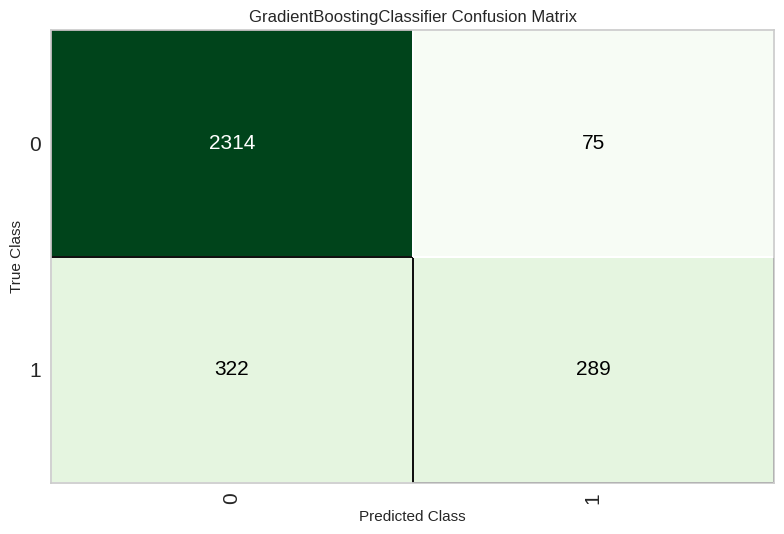

In [ ]:
from pycaret.classification import plot_model

conf_mat = plot_model(model_c, plot = 'confusion_matrix')

In [ ]:
# 混同行列を取得 (plot_model の結果から TP, FP を取得)
# 例：TP = 1000, FP = 400
TP = 289
FP = 75

# キャンペーン関連のパラメータ
campaign_cost_per_person = 1000  # 1人あたりのキャンペーン費用
max_campaign_targets = 5000  # キャンペーン対象者数の上限
churn_reduction_rate = 0.2  # キャンペーンによる解約率減少率 (仮定)
average_monthly_revenue = 10000  # 顧客の平均月間収益 (仮定)

# キャンペーン実施対象者数を計算
campaign_targets = min(TP + FP, max_campaign_targets)

# 解約防止による収益増加を計算
revenue_increase = campaign_targets * churn_reduction_rate * average_monthly_revenue

# キャンペーン費用を計算
campaign_cost = campaign_targets * campaign_cost_per_person

# ROIを計算
roi = (revenue_increase - campaign_cost) / campaign_cost

# 結果を表示
print(f"キャンペーン実施対象者数: {campaign_targets} 人")
print(f"解約防止による収益増加: {revenue_increase:,} 円")
print(f"キャンペーン費用: {campaign_cost:,} 円")
print(f"ROI: {roi:.2f} ({roi * 100:.0f}%)")

キャンペーン実施対象者数: 364 人
解約防止による収益増加: 728,000.0 円
キャンペーン費用: 364,000 円
ROI: 1.00 (100%)


最適な閾値の計算とその閾値によって閾値以上であれば1（つまりキャンペーン対象）、そうでなければ0（キャンペーン対象ではない）とする。その場合のconfusion matrixを計算とROIを試算する

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# 学習データで使用されたカラム名を取得
training_features = model_c.feature_names_in_

# テストデータから必要なカラムのみを選択
test_data_for_prediction = test_df_machining[training_features]

# 解約確率を取得 (修正済み)
y_pred_proba = model_c.predict_proba(test_data_for_prediction)[:, 1]

# ROC曲線とAUCを計算
fpr, tpr, thresholds = roc_curve(test_df_machining['Exited'], y_pred_proba)
auc = roc_auc_score(test_df_machining['Exited'], y_pred_proba)

# 最適な閾値を探索
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# キャンペーン対象判定
test_df_machining['campaign_target'] = np.where(y_pred_proba >= optimal_threshold, 1, 0)

print(f"最適な閾値: {optimal_threshold:.3f}")
print(f"AUC: {auc:.3f}")

最適な閾値: 0.206
AUC: 0.782


In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrixを計算
cm = confusion_matrix(test_df_machining['Exited'], test_df_machining['campaign_target'])

# キャンペーン関連のパラメータ
campaign_cost_per_person = 1000  # 1人あたりのキャンペーン費用
churn_reduction_rate = 0.2  # キャンペーンによる解約率減少率 (仮定)
average_monthly_revenue = 10000  # 顧客の平均月間収益 (仮定)

# キャンペーン実施対象者数
campaign_targets = cm[0, 1] + cm[1, 1] # FP + TP

# 解約防止による収益増加を計算
revenue_increase = campaign_targets * churn_reduction_rate * average_monthly_revenue

# キャンペーン費用を計算
campaign_cost = campaign_targets * campaign_cost_per_person

# ROIを計算
roi = (revenue_increase - campaign_cost) / campaign_cost

from sklearn.metrics import confusion_matrix

# Confusion Matrixを計算
cm = confusion_matrix(test_df_machining['Exited'], test_df_machining['campaign_target'])

# キャンペーン関連のパラメータ
campaign_cost_per_person = 1000  # 1人あたりのキャンペーン費用
churn_reduction_rate = 0.15  # キャンペーンによる解約率減少率 (仮定)
average_monthly_revenue = 10000  # 顧客の平均月間収益 (仮定)

# キャンペーン実施対象者数
campaign_targets = cm[0, 1] + cm[1, 1] # FP + TP

# 解約防止による収益増加を計算
revenue_increase = campaign_targets * churn_reduction_rate * average_monthly_revenue

# キャンペーン費用を計算
campaign_cost = campaign_targets * campaign_cost_per_person

# ROIを金額で計算
roi_amount = revenue_increase - campaign_cost

print("Confusion Matrix:")
print(cm)
print(f"ROI: {roi:.2f} ({roi * 100:.0f}%)")
print(f"ROI (金額): {roi_amount:,} 円")

Confusion Matrix:
[[6137 1793]
 [ 697 1373]]
ROI: 1.00 (100%)
ROI (金額): 1,583,000.0 円


In [ ]:
test_df_machining.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,event_6_ratio,event_7_ratio,event_8_ratio,event_9_ratio,event_10_ratio,event_ratio,event_ratio_binary,expenditure_count,expenditure_count_binary,campaign_target
0,621,0,0,41,2,65.00,1,1,1,101347.88,...,0,1,1,0,0,0.4,1,5,1,1
1,615,2,0,40,1,83762.86,1,0,1,112541.58,...,0,0,0,0,0,0.2,0,9,1,1
2,495,0,0,41,7,159659.80,3,1,0,113931.57,...,0,0,1,0,0,0.2,0,6,1,1
3,704,0,0,38,1,92.00,2,0,0,93826.63,...,0,0,0,0,0,0.0,0,9,1,0
4,859,2,0,43,2,125536.82,1,1,1,79084.10,...,0,1,0,0,0,0.4,1,9,1,1


In [ ]:
test_df_machining.to_csv('analyzed_results.csv', index=False)

## 結論

作製したモデルで想定したキャンペーンを実施すれば、ROI:\1,583,000になる見込み。また、ターゲットリストも作成。

# Appendix

## 作製したターゲットリストをクラスタリングで各属性に分類したあと、それぞれの属性でROIを試算してみる。

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# クラスタリングに使用する特徴量を選択
features = ['Age', 'NumOfProducts', 'Balance','IsActiveMember', 'Geography']
X = test_df_machining[features]

# StandardScalerで標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeansでクラスタリング
kmeans = KMeans(n_clusters=4, random_state=0)  # クラスタ数を5に設定
test_df_machining['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
for cluster in range(4):  # クラスタ0から4までループ
    cluster_data = test_df_machining[test_df_machining['cluster'] == cluster]

    # 混同行列を取得
    cm = confusion_matrix(cluster_data['Exited'], cluster_data['campaign_target'])

    # キャンペーン関連のパラメータ
    campaign_cost_per_person = 1000  # 1人あたりのキャンペーン費用
    churn_reduction_rate = 0.15  # キャンペーンによる解約率減少率 (仮定)
    average_monthly_revenue = 10000  # 顧客の平均月間収益 (仮定)

    # キャンペーン実施対象者数
    campaign_targets = cm[0, 1] + cm[1, 1] # FP + TP

    # 解約防止による収益増加を計算
    revenue_increase = campaign_targets * churn_reduction_rate * average_monthly_revenue

    # キャンペーン費用を計算
    campaign_cost = campaign_targets * campaign_cost_per_person

    # ROIを計算
for cluster in range(4):  # クラスタ0から4までループ
    cluster_data = test_df_machining[test_df_machining['cluster'] == cluster]

    # 混同行列を取得
    cm = confusion_matrix(cluster_data['Exited'], cluster_data['campaign_target'])

    # キャンペーン関連のパラメータ
    campaign_cost_per_person = 1000  # 1人あたりのキャンペーン費用
    churn_reduction_rate = 0.15  # キャンペーンによる解約率減少率 (仮定)
    average_monthly_revenue = 10000  # 顧客の平均月間収益 (仮定)

    # キャンペーン実施対象者数
    campaign_targets = cm[0, 1] + cm[1, 1] # FP + TP

    # 解約防止による収益増加を計算
    revenue_increase = campaign_targets * churn_reduction_rate * average_monthly_revenue

    # キャンペーン費用を計算
    campaign_cost = campaign_targets * campaign_cost_per_person

    # ROIを計算
    roi = (revenue_increase - campaign_cost) / campaign_cost

    print(f"クラスタ {cluster} のROI: {roi:.2f} ({roi * 100:.0f}%)")

クラスタ 0 のROI: 0.50 (50%)
クラスタ 1 のROI: 0.50 (50%)
クラスタ 2 のROI: 0.50 (50%)
クラスタ 3 のROI: 0.50 (50%)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# クラスタリングに用いた特徴量を選択
features = ['Age', 'NumOfProducts', 'event_ratio','expenditure_count', 'expenditure_ratio']
X = test_df_machining[features]

# StandardScalerで標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCAで次元削減
pca = PCA(n_components=2)  # 2次元に圧縮
X_pca = pca.fit_transform(X_scaled)

# クラスタリング結果をDataFrameに追加
test_df_machining['pca_x'] = X_pca[:, 0]
test_df_machining['pca_y'] = X_pca[:, 1]

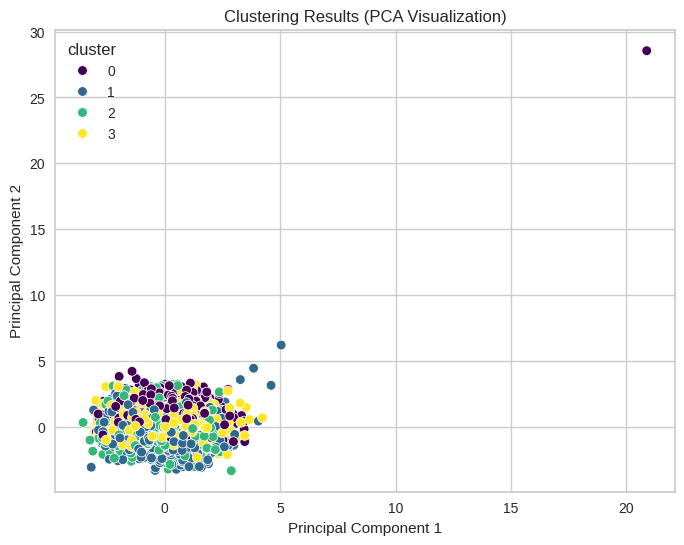

In [ ]:
# クラスタごとに色分けしてプロット
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', data=test_df_machining, palette='viridis')
plt.title('Clustering Results (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## キャンペーン施策がどの程度因果関係があるか調べるために、ランダム化比較試験をしてみる。

処置群: キャンペーン施策を受けるグループ

対照群: キャンペーン施策を受けないグループ

その後、両グループの解約率を比較することで、キャンペーン施策の効果を測定。

In [ ]:
from sklearn.metrics import confusion_matrix

# 顧客をランダムに2つのグループに分割 (処置群と対照群)
test_df_machining['treatment_group'] = np.random.randint(0, 2, size=len(test_df_machining))

for cluster in range(4):  # クラスタ0から2までループ (KMeansで設定したクラスタ数に合わせる)
    # 処置群と対照群のデータを抽出
    treatment_data = test_df_machining[(test_df_machining['cluster'] == cluster) & (test_df_machining['treatment_group'] == 1)]
    control_data = test_df_machining[(test_df_machining['cluster'] == cluster) & (test_df_machining['treatment_group'] == 0)]

    # 両方のグループにデータが存在する場合のみ分析
    if not treatment_data.empty and not control_data.empty:
        # 処置群と対照群の解約率を計算
        treatment_churn_rate = treatment_data['Exited'].mean()
        control_churn_rate = control_data['Exited'].mean()

        # キャンペーン効果 (解約率の差) を計算
        campaign_effect = control_churn_rate - treatment_churn_rate

        print(f"クラスタ {cluster} のキャンペーン効果: {campaign_effect:.2f}")

        # 以前のROI計算ロジックを適用 (必要に応じて修正)
        # ...

    else:
        print(f"クラスタ {cluster} には十分なデータポイントがありません。")

クラスタ 0 のキャンペーン効果: 0.05
クラスタ 1 のキャンペーン効果: -0.01
クラスタ 2 のキャンペーン効果: 0.01
クラスタ 3 のキャンペーン効果: -0.00


クラスタ 0 に対してはキャンペーン施策が有効である可能性が高いです。他のクラスタに対しては、キャンペーン施策の効果は限定的であるか、または逆効果である可能性も考えられる。

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

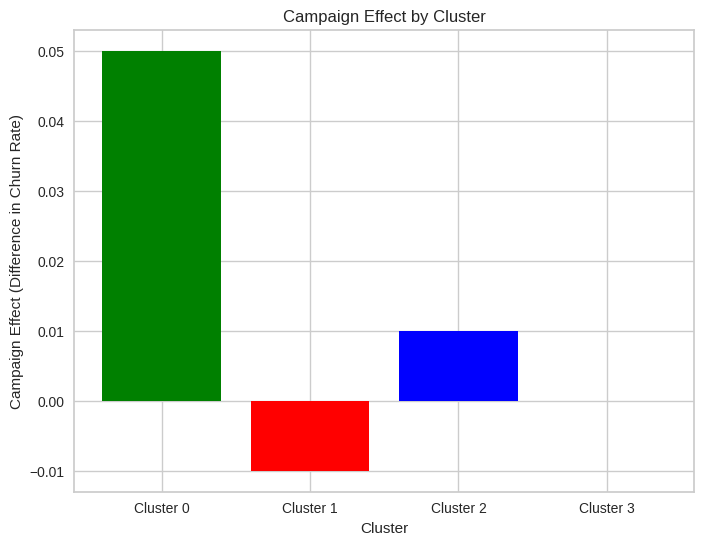

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# RCTの結果を格納するリスト
cluster_effects = [0.05, -0.01, 0.01, -0.00]

# クラスタのラベル
cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

# 棒グラフを作成
plt.figure(figsize=(8, 6))
plt.bar(cluster_labels, cluster_effects, color=['green', 'red', 'blue', 'gray'])

# グラフのタイトルと軸ラベルを設定
plt.title('Campaign Effect by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Campaign Effect (Difference in Churn Rate)')

# 水平線を追加 (y=0)
plt